In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#fjfjf

Each text file contains a column of the runtime for a given array size. There are separate text files for the different array sizes. 

In [87]:
#First two files are for N = 10 and N = 100 
rt_array = np.array([float(np.mean(pd.read_table('runtime10.txt',header = None))),float(np.mean(pd.read_table('runtime100.txt',header = None)))])

#The next files are all evenly spaced by 200, so can loop to read them in. 
for n in (np.arange(200,3400,200)):
    rtfile = ('runtime'+str(n)+'.txt')
    rt_array = np.append(rt_array,float(np.mean(pd.read_table(rtfile,header = None))))



In [93]:
n_array = np.array([10,100,200,400,600,800,1000,1200,1400,1600,1800,2000,
                    2200,2400,2600,2800,3000,3200], dtype=np.int64)

#initialize an array to store the number of floating point operations.
flop_array = []

#Calculate the number of floating point operations for each array size. 
for val in n_array:
     flop_array.append((val**2)*(2*val-1))
 
flop_array = np.array(flop_array)

#Calculate the performance in (Gflop/s)
performance = (flop_array/1e9)/rt_array

# print(flop_array)

Below I calculate the theoretical peak performance of my Dell Precision 7920 Desktop

In [94]:
ncores = 20 #number of cores
clkspeed = 2.1 #2.1 GHz
fpus = 1 #assuming one FPU for now... (FPU/core??)

peakp = ncores*clkspeed*fpus

print("Theoretical Peak Performance:",peakp,"GFlop/s")


Theoretical Peak Performance: 42.0 GFlop/s


Text(0, 0.5, 'GFlop/s')

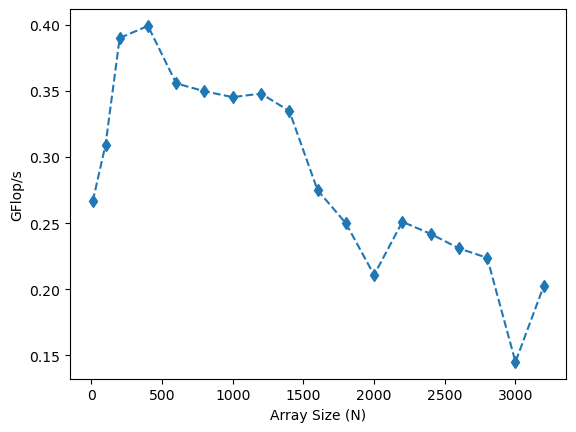

In [92]:
plt.figure()
plt.plot(n_array,performance,'--d')
plt.xlabel('Array Size (N)')
plt.ylabel('GFlop/s')
# plt.axhline(y=peakp, linestyle='--', color='red', label='Peak Performance')
